# Item 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import datetime as datetime
import glob

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
eci = pd.read_csv('Entrenamieto_ECI_2020.csv')

# TP1

In [3]:
eciOp = eci.drop_duplicates('Opportunity_ID')

In [4]:
stage = eciOp['Stage'].value_counts().to_frame().reset_index()\
                      .rename(columns={'index':'Stage','Stage':'cantidad'})
stage

,Stage,cantidad
0,Closed Won,5072
1,Closed Lost,4719
2,Proposal,30
3,Negotiation,11
4,Qualification,9


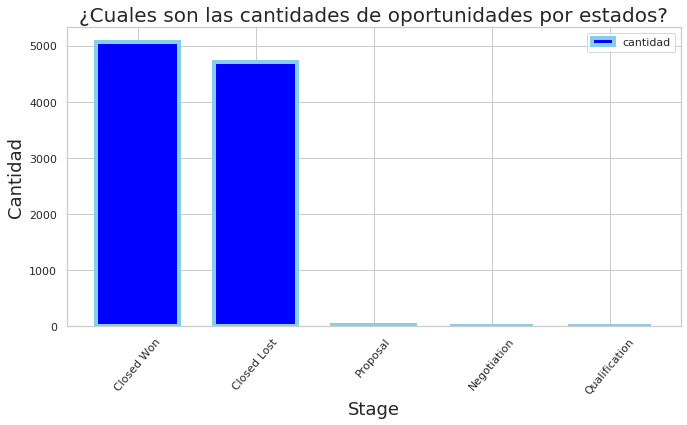

In [5]:
stage.plot(kind='bar', x='Stage', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='blue',\
                 edgecolor="skyblue", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿Cuales son las cantidades de oportunidades por estados?",\
            fontsize=20);
g.set_xlabel("Stage", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [6]:
region = eciOp['Region'].value_counts().to_frame().reset_index()\
                        .rename(columns={'index':'Region','Region':'cantidad'})
region

,Region,cantidad
0,EMEA,3241
1,Americas,2459
2,APAC,2086
3,Japan,1906
4,Middle East,149


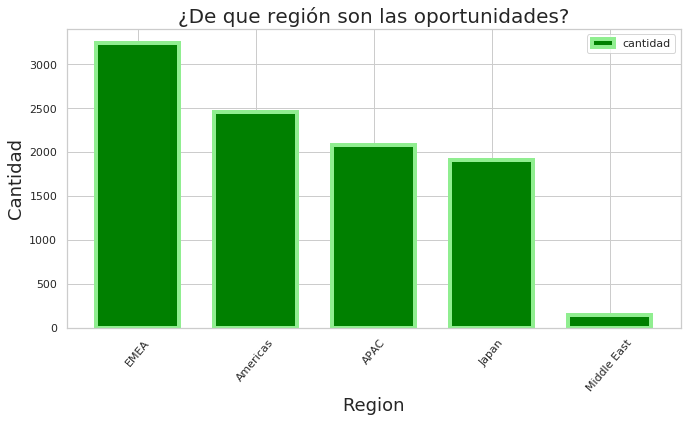

In [7]:
region.plot(kind='bar', x='Region', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿De que región son las oportunidades?",\
            fontsize=20);
g.set_xlabel("Region", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [8]:
territory = eciOp['Territory'].value_counts().to_frame().reset_index()\
                              .rename(columns={'index':'Territorio','Territory':'cantidad'})
territory = territory[territory['Territorio']!='None'].head(10)
territory

,Territorio,cantidad
1,Germany,1080
2,NW America,878
3,India,680
4,Japan,607
5,Australia,579
6,NE America,518
7,France,393
8,Netherlands,384
9,SE America,340
10,Singapore,293


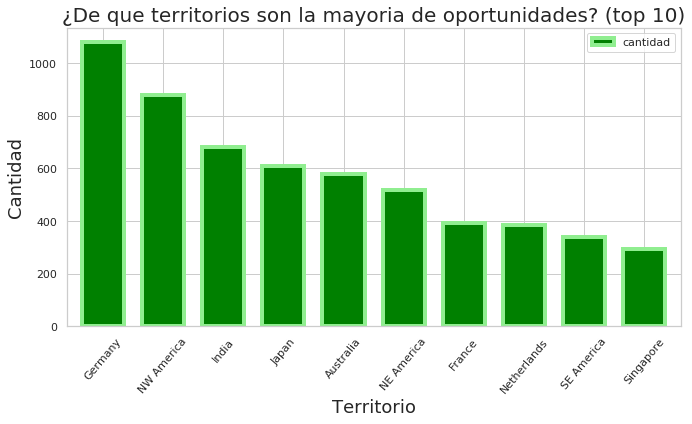

In [9]:
territory.plot(kind='bar', x='Territorio', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿De que territorios son la mayoria de oportunidades? (top 10)",\
            fontsize=20);
g.set_xlabel("Territorio", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [35]:
billingCountry = eciOp['Billing_Country'].value_counts().to_frame().reset_index()\
                                         .rename(columns={'index':'Pais','Billing_Country':'cantidad'})
billingCountry 

,Pais,cantidad
0,United States,2350
1,Japan,1899
2,Germany,1308
3,India,560
4,Australia,559
...,...,...
75,Armenia,1
76,Liechtenstein,1
77,Slovakia,1
78,Oman,1


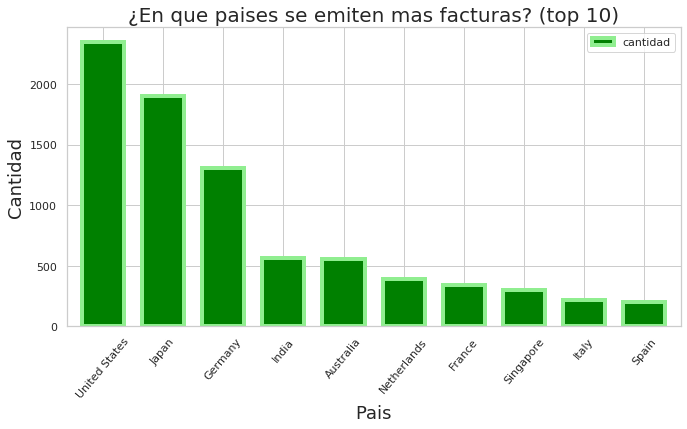

In [36]:
billingCountry.head(10).plot(kind='bar', x='Pais', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4, rot=50)
g=plt.gca()
g.set_title("¿En que paises se emiten mas facturas? (top 10)",\
            fontsize=20);
g.set_xlabel("Pais", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [10]:
eciOp['Account_Created_Date'] = pd.to_datetime(eciOp['Account_Created_Date'])
eciOp['Account_Created_Year'] = eciOp['Account_Created_Date'].dt.year
accountCreatedYear = eciOp['Account_Created_Year'].value_counts().to_frame().reset_index()\
                            .rename(columns={'index':'Año','Account_Created_Year':'cantidad'})
accountCreatedYear

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Año,cantidad
0,2013,2835
1,2016,2137
2,2015,1898
3,2017,1526
4,2014,885
5,2018,560


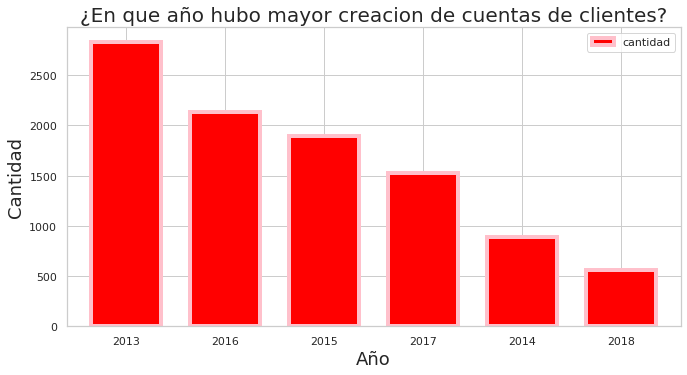

In [11]:
accountCreatedYear.plot(kind='bar', x='Año', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='red',\
                 edgecolor="pink", linewidth=4, rot=0)
g=plt.gca()
g.set_title("¿En que año hubo mayor creacion de cuentas de clientes?",\
            fontsize=20);
g.set_xlabel("Año", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [12]:
eciOp['Opportunity_Created_Date'] = pd.to_datetime(eciOp['Opportunity_Created_Date'])
eciOp['Opportunity_Created_Year'] = eciOp['Opportunity_Created_Date'].dt.year
opportunityCreatedYear = eciOp['Opportunity_Created_Year'].value_counts().to_frame().reset_index()\
                            .rename(columns={'index':'Año','Opportunity_Created_Year':'cantidad'})
opportunityCreatedYear

/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/german/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Año,cantidad
0,2017,4046
1,2018,2691
2,2016,2569
3,2015,511
4,2014,23
5,2013,1


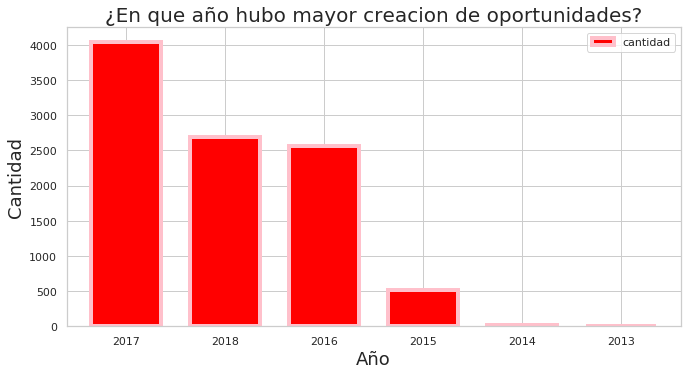

In [13]:
opportunityCreatedYear.plot(kind='bar', x='Año', y='cantidad',\
                 width=0.7, figsize=(11,5.5), color='red',\
                 edgecolor="pink", linewidth=4, rot=0)
g=plt.gca()
g.set_title("¿En que año hubo mayor creacion de oportunidades?",\
            fontsize=20);
g.set_xlabel("Año", fontsize=18);
g.set_ylabel("Cantidad", fontsize=18);

In [14]:
#Columna inservible
eci['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [23]:
#Columna inservible (creo)
eci['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [57]:
#Columna inservible (creo)
eci['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [61]:
#Columna inservible
eci['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64